# 실습: 수의 정확도, 오차
**강좌**: *수치해석*

**Due**: 2024/09/26

## Problem #1
$\cos(x)$ 과 $\sin(x)$ 함수는 Taylor expansion에 의해 다음과 같이 표현할 수 있다.

$$
\begin{align}
\cos x &= 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + ... \\
\sin x &= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...
\end{align}
$$

여기서 $x$의 단위는 radian이다.

$x$가 5도 각도일 때 근사항의 갯수에 따른 절대오차, 참 상대오차, 근사 상대 오차를 구하고 이를 그래프로 표현하시오.

Tip) `np.deg2rad`, `np.rad2deg` 함수 참고할 것

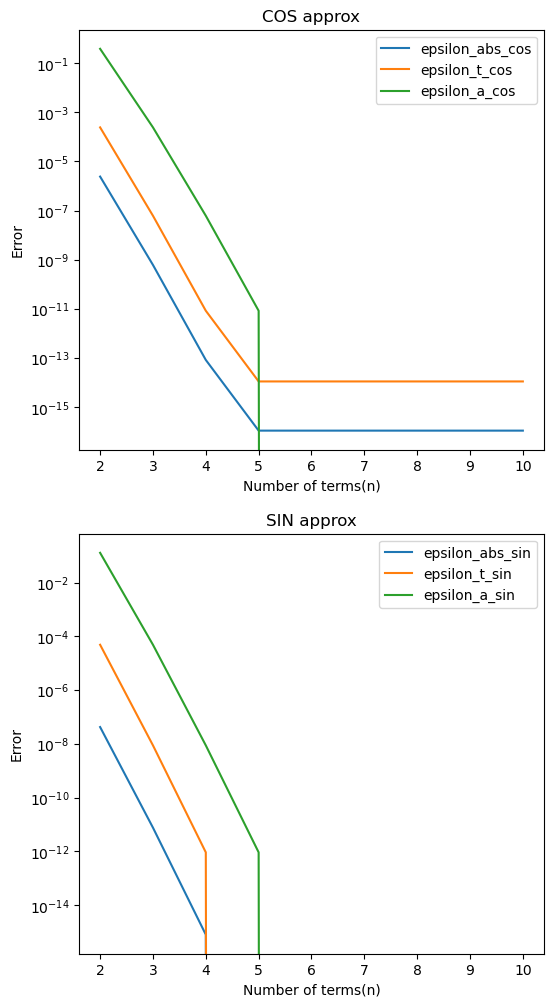

In [2]:
# Write your answer
import numpy as np
from matplotlib import pyplot as plt

x_deg = 5
x_rad = np.deg2rad(x_deg)
error_abs_cos =[]
error_t_cos =[]
error_a_cos =[]
error_abs_sin =[]
error_t_sin =[]
error_a_sin=[]

def factorial(n) :
    """ factorial 구현
    parameters
    n : int
    n까지의 팩토리얼
    """
    fac = 1
    for i in range(1,n+1) :
        fac *= i
    return fac

def approx_cos(n,x) :
    """ cos 함수 근사
    n : int
    항의 개수(근사에 사용할 항의 개수)
    x : float
    계산할 값
    """
    cos = 0
    for i in range(n) :
        cos += ((-1)**i)*(x**(2*i))/factorial(2*i)

    return cos

def approx_sin(n,x) :
    """ sin 함수 근사
    n : int
    근사에 사용할 항의 개수
    x : float
    계산할 값
    """
    sin = 0
    for i in range(n) :
        sin += ((-1)**i)*(x**(2*i+1))/factorial(2*i+1)
    return sin

def epsilon_abs_cos(n, x) :
    exact_cos = np.cos(x)
    approx = approx_cos(n,x)
    error = abs(exact_cos - approx)

    return  error

def epsilon_abs_sin(n, x) :
    exact_sin = np.sin(x)
    approx = approx_sin(n,x)
    error = abs(exact_sin - approx)

    return error

def epsilon_t_cos(n,x) :
    exact_cos = np.cos(x)
    approx = approx_cos(n,x)
    error = abs(exact_cos - approx)/exact_cos

    return error * 100

def epsilon_t_sin(n,x) :
    exact_sin = np.sin(x)
    approx = approx_sin(n,x)
    error = abs(exact_sin - approx)/exact_sin

    return error *100

def epsilon_a_cos(n,x) :
    exact = np.cos(x)
    approx = approx_cos(n,x)
    approx1 = approx_cos(n-1,x)
    error = abs(approx-approx1)/approx *100
    return error

def epsilon_a_sin(n,x) :
    exact = np.sin(x)
    approx = approx_sin(n,x)
    approx1 = approx_sin(n-1,x)
    error = abs(approx-approx1)/approx *100
    return error

for n in range(2,11) : #근사상대오차를 구할 때 1부터 넣어버리면 0번째 항부터 시작해서 range를 2부터 한거임 1도 닶이랑은 상관없음 0만 아니면 될 듯
    x  = x_rad
    eabs_cos = epsilon_abs_cos(n,x)
    eabs_sin = epsilon_abs_sin(n,x)
    et_cos = epsilon_t_cos(n,x)
    et_sin = epsilon_t_sin(n,x)
    ea_cos = epsilon_a_cos(n,x)
    ea_sin = epsilon_a_sin(n,x)
    error_abs_cos.append(eabs_cos)
    error_abs_sin.append(eabs_sin)
    error_t_cos.append(et_cos)
    error_t_sin.append(et_sin)
    error_a_cos.append(ea_cos)
    error_a_sin.append(ea_sin)
#print(f"abs_cos{error_abs_cos}, et_cos{error_t_cos}, ea_cos{error_a_cos}")
plt.figure(figsize=(6, 12))
plt.subplot(2,1,1)
plt.semilogy(range(2,11),error_abs_cos)
plt.semilogy(range(2,11), error_t_cos)
plt.semilogy(range(2,11), error_a_cos)
plt.legend(['epsilon_abs_cos', 'epsilon_t_cos', 'epsilon_a_cos'])
plt.title('COS approx')
plt.xlabel('Number of terms(n)')
plt.ylabel('Error')

plt.subplot(2,1,2)
plt.semilogy(range(2,11), error_abs_sin)
plt.semilogy(range(2,11), error_t_sin)
plt.semilogy(range(2,11), error_a_sin)
plt.legend(['epsilon_abs_sin','epsilon_t_sin','epsilon_a_sin'])
plt.title('SIN approx')
plt.xlabel('Number of terms(n)')
plt.ylabel('Error')
plt.show()

## Problem #2
단정밀도 (np.float32) 대해서 머신 Epsilon을 구하고, 뺄샘의 무효화, Overflow, Underflow 상황을 만들어 보시오.

In [8]:
# Write your answer
import numpy as np
# Machine epsilon
machine_epsilon = np.finfo(np.float32).eps
print(np.finfo(np.float32))
print(machine_epsilon)
# 뺄샘의 무효화
print(np.float32(0.5) - np.float32(0.4999999999))
# Overflow
print(np.float32(3.4e38) + np.float32(0.1e38))
# Underflow
print(np.float32(1.4012985e-45)/np.float32(10))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

1.1920929e-07
0.0
inf
0.0


/var/folders/24/_mpvs7111qv2f2kplthdfl980000gn/T/ipykernel_44620/144718661.py:10: RuntimeWarning: overflow encountered in scalar add
  print(np.float32(3.4e38) + np.float32(0.1e38))


## Problem #3
$\sin(x)$ 를 $a=\pi/4$ 를 기준으로 Taylor series를 이용하여 근사식을 구하고, $[0, \pi/2]$ 구간에서 근사해와 이론해를 비교하시오. 전단오차의 크기를 확인하시오.

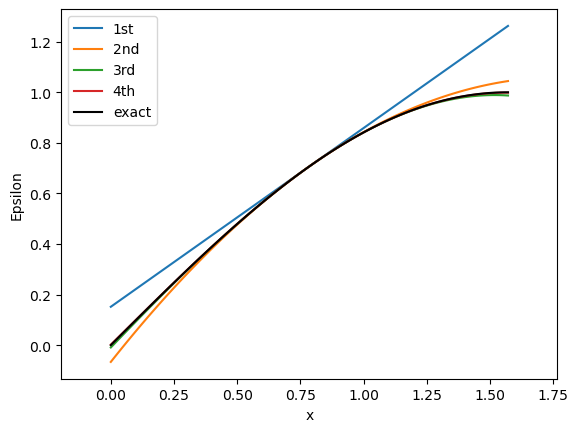

In [9]:
# Write your answer, 근사해 이론해 비교
import numpy as np
from matplotlib import pyplot as plt

x_cal = np.linspace(0,np.pi/2, 101)
exact_sin = np.sin(x_cal)

def factorial(n) :
    """ factorial 구현
    n : int
    n까지의 팩토리얼
    """
    fac = 1
    for i in range(1,n+1) :
        fac *= i
    return fac

def taylor_sin(n,x) :
    """ sin을 테일러 급수로 근사
    n : int
    n은 근사할 차수
    x : float
    계산할 값
    """
    sin = 0
    a = np.pi/4
    sign_cos = 1
    sign_sin = 1
    for i in range(1,n+1) :
            if i % 2 == 1 :
                sin += sign_sin*np.sin(a)*((x-a)**(i-1))/factorial(i-1)
                sign_sin *= -1
            else :
                sin += sign_cos*np.cos(a)*((x-a)**(i-1))/factorial(i-1)
                sign_cos *= -1
    return sin

for i in range(2,6) :
    approx = taylor_sin(i, x_cal)
    plt.plot(x_cal, approx)

plt.plot(x_cal, np.sin(x_cal), color = 'black')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('Epsilon')
plt.legend(['1st','2nd','3rd','4th','exact'])
plt.show()

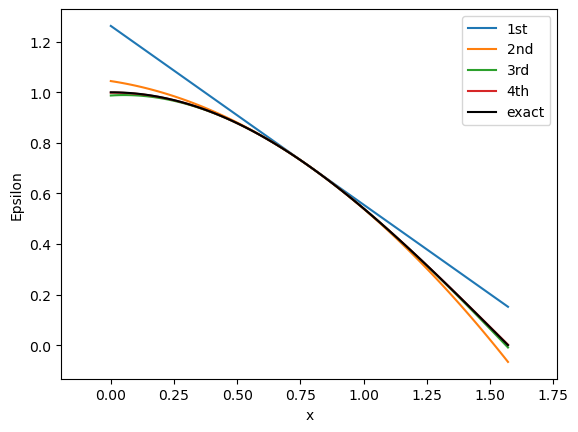

In [6]:
# Write your answer, 근사해 이론해 비교
import numpy as np
from matplotlib import pyplot as plt

x_cal = np.linspace(0,np.pi/2, 101)
exact_cos = np.cos(x_cal)

def factorial(n) :
    """ factorial 구현
    n : int
    n까지의 팩토리얼
    """
    fac = 1
    for i in range(1,n+1) :
        fac *= i
    return fac

def taylor_cos(n,x) :
    """ cos을 테일러 급수로 근사
    n : int
    n은 근사할 차수
    x : float
    계산할 값
    """
    cos = 0
    a = np.pi/4

    sign_cos = 1
    sign_sin = -1
    for i in range(1,n+1) :
            if i % 2 == 1 :
                cos += sign_cos*np.cos(a)*((x-a)**(i-1))/factorial(i-1)
                sign_cos *= -1
            else :
                cos += sign_sin*np.sin(a)*((x-a)**(i-1))/factorial(i-1)
                sign_sin *= -1
    return cos

for i in range(2,6) :
    approx = taylor_cos(i, x_cal)
    plt.plot(x_cal, approx)

plt.plot(x_cal, np.cos(x_cal), color = 'black')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('Epsilon')
plt.legend(['1st','2nd','3rd','4th','exact'])
plt.show()  

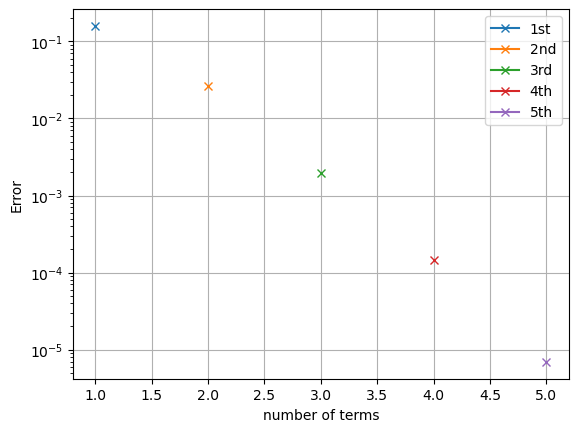

In [22]:
#전단오차
import numpy as np
from matplotlib import pyplot as plt

x_cal = np.pi/3
exact_sin = np.sin(x_cal)

def factorial(n) :
    """ factorial 구현
    n : int
    n까지의 팩토리얼
    """
    fac = 1
    for i in range(1,n+1) :
        fac *= i
    return fac

def taylor_sin(n,x) :
    """ sin을 테일러 급수로 근사
    n : int
    n은 근사할 차수
    x : float
    계산할 값
    """
    sin = 0
    a = np.pi/4
    sign_cos = 1
    sign_sin = 1
    for i in range(1,n+1) :
            if i % 2 == 1 :
                sin += sign_sin*np.sin(a)*((x-a)**(i-1))/factorial(i-1)
                sign_sin *= -1
            else :
                sin += sign_cos*np.cos(a)*((x-a)**(i-1))/factorial(i-1)
                sign_cos *= -1
    return sin

for i in range(1,6) :
    approx = taylor_sin(i, x_cal)
    error = abs(approx - exact_sin) #전단오차 근사-> Trunction 절단을 어디까지 했냐를 실제값과 비교하는 것
    plt.semilogy(i, error, marker = 'x')

plt.xlabel('number of terms')
plt.ylabel('Error')
plt.legend(['1st','2nd','3rd','4th','5th'])
plt.grid(True)
plt.show()

## Problem #4
Condition 수를 구하고 그 의미를 설명하시오.

(a) $f(x) = \sqrt{|x-1|} + 1$, $x=1.00001$

(b) $f(x) = \frac{\sin(x)}{\cos(x) + 1}$, $x=1.0001\pi$

In [11]:
# Write your answer for (a)
import numpy as np
x_cal = 1.00001

def function (x) :
  """ x = 계산할 값
  """
  f = np.sqrt(abs(x-1)) + 1
  return f
def df (x) :
  """ x = 계산할 값
  """
  #x=1에서 부호가 변함으로 범위를 나누어서 미분값을 지정함
  if x > 1 :
    df = abs(1/(2*np.sqrt(x-1)))
    return df
  else :
    df = abs(1/(2*np.sqrt(1-x)))
    return df

cond = x_cal * df(x_cal) / function(x_cal)

print(cond)

# 의미: conditon number가 157.61703531708432라는 의미는 입력값의 작은 변화에도 결과값은 큰 변화가 나타난다 따라서 ill-conditioned 함수임을 알 수 있다..

157.61703531708432


In [12]:
# Write your answer for (b)
import numpy as np
x_cal = 1.0001*np.pi
def function (x) :
  """ x = 계산할 값
  """
  f = np.sin(x)/(np.cos(x)+1)
  return f

def df (x) :
  """ x = 계산할 값
  """
  df = abs(1/(np.cos(x)+1))
  return df

cond = abs(x_cal * df(x_cal) / function(x_cal))

print(cond)

# 의미: condition number가 10001.000164511552라는 의미는 입력값의 작은 변화에도 결과값은 큰 변화가 나타난다 따라서 ill-conditioned 함수임을 알 수 있다.
# condition number는 함수의 민감도르르 나타내는 값이므로 음수가 될 수 없으므로 절댓값을 해주어야한다.

10001.000164511552
